### Урок 2. Масштабирование признаков. Регуляризация. Стохастический градиентный спуск

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])

In [ ]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Нормализация [0, 1]

In [ ]:
X[1].min(), X[1].max()

(0, 10)

In [ ]:
X[2].min(), X[2].max()

(450, 2000)

In [ ]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 5.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [ ]:
X_norm[1] = (X[1] - X[1].min()) / (X[1].max() - X[1].min())
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e-01, 1.00e-01, 2.00e-01, 5.00e-01, 3.00e-01, 0.00e+00,
        5.00e-01, 1.00e+00, 1.00e-01, 2.00e-01],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [ ]:
X_norm[2] = (X[2] - X[2].min()) / (X[2].max() - X[2].min())
X_norm

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.1       , 0.1       , 0.2       , 0.5       , 0.3       ,
        0.        , 0.5       , 1.        , 0.1       , 0.2       ],
       [0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
        0.22580645, 0.67741935, 1.        , 0.        , 0.35483871],
       [1.        , 1.        , 2.        , 1.        , 2.        ,
        1.        , 3.        , 3.        , 1.        , 2.        ]])

In [ ]:
Стандартизация

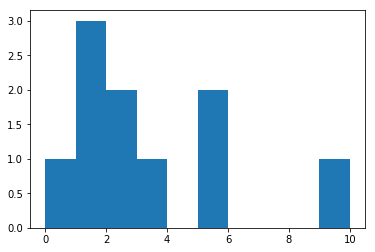

In [ ]:
plt.hist(X[1])
plt.show()

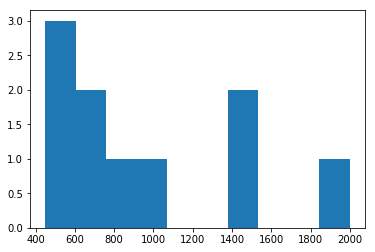

In [ ]:
plt.hist(X[2])
plt.show()

In [ ]:
X_st = X.copy().astype(np.float64)
X1_mean = X[1].mean()
X1_std = X[1].std()
print(X1_mean, X1_std)

3.0 2.8284271247461903


In [ ]:
X_st[1] = (X[1] - X1_mean) / X1_std
X_st

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00],
       [-7.07106781e-01, -7.07106781e-01, -3.53553391e-01,
         7.07106781e-01,  0.00000000e+00, -1.06066017e+00,
         7.07106781e-01,  2.47487373e+00, -7.07106781e-01,
        -3.53553391e-01],
       [ 5.00000000e+02,  7.00000000e+02,  7.50000000e+02,
         6.00000000e+02,  1.45000000e+03,  8.00000000e+02,
         1.50000000e+03,  2.00000000e+03,  4.50000000e+02,
         1.00000000e+03],
       [ 1.00000000e+00,  1.00000000e+00,  2.00000000e+00,
         1.00000000e+00,  2.00000000e+00,  1.00000000e+00,
         3.00000000e+00,  3.00000000e+00,  1.00000000e+00,
         2.00000000e+00]])

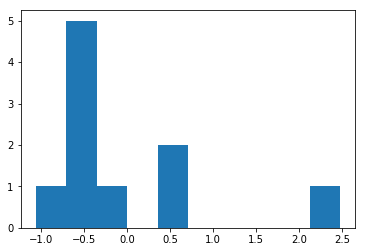

In [ ]:
plt.hist(X_st[1])
plt.show()

In [ ]:
def calc_std_fit(x):
    res = (x - x.mean()) / x.std()
    return res

In [ ]:
X_st[2] = calc_std_fit(X[2])

In [ ]:
X_st[3] = calc_std_fit(X[3])
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.70710678, -0.70710678, -0.35355339,  0.70710678,  0.        ,
        -1.06066017,  0.70710678,  2.47487373, -0.70710678, -0.35355339],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

In [ ]:
SGD (Stochastic gradient descent)

In [ ]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [ ]:
def eval_model(X, y, iterations, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T)))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [ ]:
eval_model(X_st, y, iterations=1000, alpha=1e-2)

100 [48.86357054  4.70933069  3.7563128   3.82527101] 88.56912574218507
200 [55.48726012  5.22165972  2.94894899  4.22103158] 27.831665677530538
300 [56.36569089  5.53334529  2.30299496  4.58498993] 26.129673576981542
400 [56.48218798  5.73727453  1.79208588  4.91322327] 25.697650685805378
500 [56.49763778  5.87587867  1.38428915  5.19823802] 25.428673535400087
600 [56.49968672  5.97361628  1.0566565   5.44020196] 25.252025934174732
700 [56.49995845  6.04487461  0.79222433  5.64275664] 25.1352194080658
800 [56.49999449  6.09831892  0.57812653  5.81080469] 25.05777596007728
900 [56.49999927  6.13932278  0.40440596  5.94940993] 25.006368043560236
1000 [56.4999999   6.1713339   0.26323888  6.06328919] 24.972223792293708


array([56.4999999 ,  6.1713339 ,  0.26323888,  6.06328919])

In [ ]:
def eval_sgd_model(X, y, iterations, qty_in_batch, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    n_batch = n // qty_in_batch
    
    if n % qty_in_batch != 0:
        n_batch += 1
        
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)
#             print(b, n_batch, start_, end_)
            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]

            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)

            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)))
        
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [ ]:
eval_sgd_model(X_st, y, iterations=5000, qty_in_batch=4, alpha=1e-2)

500 [56.50791768  5.97052641  1.07587083  5.43675955] 13.194149231363648
1000 [56.51047356  6.20416485  0.14899919  6.16250325] 11.970671786542717
1500 [56.51056702  6.2744152  -0.18006825  6.43230143] 11.533004188286078
2000 [56.51060114  6.29898013 -0.29822307  6.52980453] 11.376643000780632
2500 [56.51061344  6.30778088 -0.34071642  6.56490297] 11.320608661860906
3000 [56.51061786  6.31094498 -0.35600231  6.57753038] 11.300482460063158
3500 [56.51061945  6.31208314 -0.36150119  6.58207301] 11.293246560321307
4000 [56.51062003  6.31249257 -0.36347935  6.58370716] 11.290644092689014
4500 [56.51062023  6.31263986 -0.36419097  6.58429503] 11.289707959084065
5000 [56.51062031  6.31269285 -0.36444697  6.58450651] 11.28937120566779


array([56.51062031,  6.31269285, -0.36444697,  6.58450651])

In [ ]:
L1 регуляризация

In [ ]:
f(x, W) + (lambda_/2) * np.sum(np.abs(W))

In [ ]:
L2 регуляризация

In [ ]:
f(x, W) + (lambda_/2) * np.sum(W**2)

In [ ]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
#         if i % (iterations / 10) == 0:
#             print(i, W, err)
    return W

In [ ]:
W = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

500 [56.49487895  5.89947315  1.04054601  5.5270874 ] 25.23755832331096
1000 [56.49717505  6.19501568  0.13564839  6.17098435] 24.947089650389493
1500 [56.49717514  6.26565597 -0.17868956  6.42516923] 24.910200887020064
2000 [56.49717514  6.28924463 -0.29120292  6.51776763] 24.905377672807827
2500 [56.49717514  6.29763759 -0.33165155  6.55113988] 24.904735047224676
3000 [56.49717514  6.30065228 -0.3462019   6.56314895] 24.904645262343745
3500 [56.49717514  6.3017366  -0.35143648  6.56746949] 24.904631263168568
4000 [56.49717514  6.30212668 -0.35331967  6.56902387] 24.904628595590758
4500 [56.49717514  6.30226702 -0.35399717  6.56958307] 24.904627942486606
5000 [56.49717514  6.30231751 -0.35424091  6.56978425] 24.904627747206018


In [ ]:
eval_model(X_st, y, iterations=5000, alpha=1e-2)

500 [56.49767254  5.83477719  1.36781865  5.25424451] 25.413829625514786
1000 [56.4999999   6.17124081  0.25269258  6.07416416] 24.969784391475397
1500 [56.5         6.2575128  -0.13774522  6.39128671] 24.913059475565493
2000 [56.5         6.28678323 -0.27772011  6.50655795] 24.905712417850083
2500 [56.5         6.29722767 -0.32807425  6.54810646] 24.904760553791704
3000 [56.5         6.30098239 -0.34619733  6.56306445] 24.904637232271696
3500 [56.5         6.30233363 -0.3527205   6.5684486 ] 24.904621254991206
4000 [56.5         6.30281999 -0.35506846  6.57038658] 24.904619185007867
4500 [56.5         6.30299505 -0.35591359  6.57108415] 24.904618916825108
5000 [56.5         6.30305806 -0.35621778  6.57133523] 24.90461888207993


array([56.5       ,  6.30305806, -0.35621778,  6.57133523])

### Практическое задание

* Постройте график зависимости весов всех признаков от lambda в L2-регуляризации на основе данных из урока.

* Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

* Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.